In [8]:
import pandas as pd
import matplotlib.pyplot as plt 
from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/ML%20Pemula/Mall_Customers.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [16]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


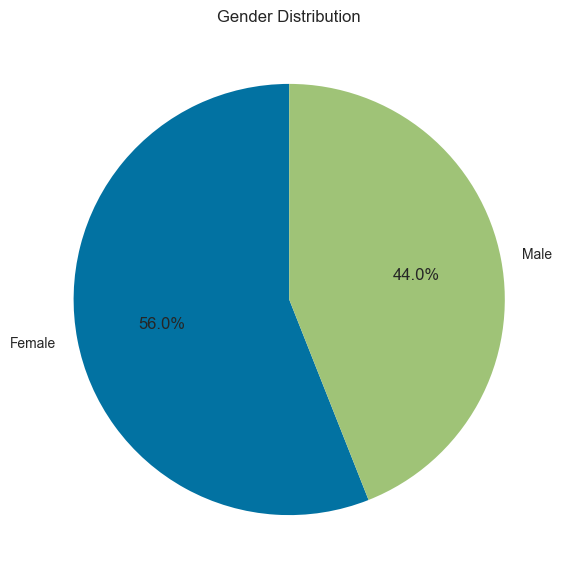

In [26]:
plt.figure(figsize=(7, 7))
plt.pie(df['Gender'].value_counts(), labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution")
plt.show()

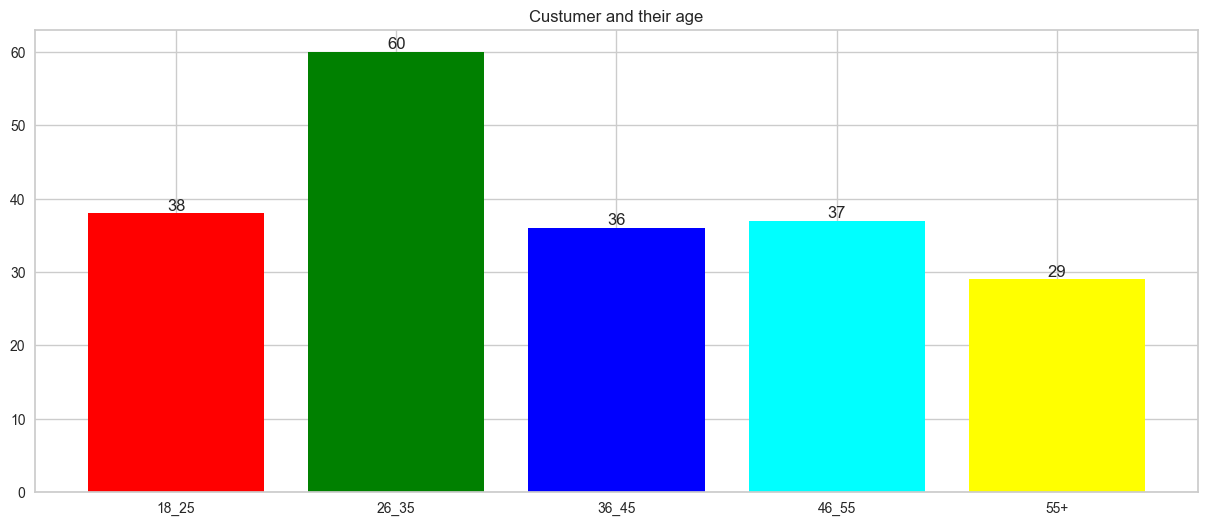

In [47]:
age18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age26_35 = df.Age[(df.Age >= 26)& (df.Age <= 35)]
age36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]

age55above = df.Age[df.Age >= 56]

x = ['18_25', '26_35', '36_45', '46_55', '55+']
y = [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55above)]

plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title('Custumer and their age')

for i in range(len(x)):
    plt.text(i, y[i], y[i],  ha='center', va='bottom')
plt.show()

In [42]:
len(age18_25.values)

38

In [48]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


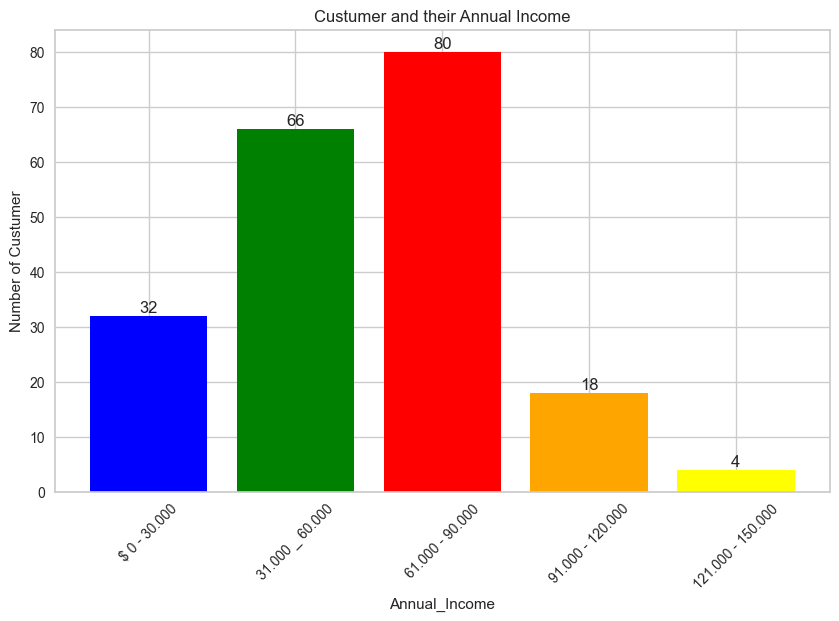

In [68]:
a0_30 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 0) & (df['Annual Income (k$)'] <= 30)]
a31_60 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 31) & (df['Annual Income (k$)'] <= 60)]
a61_90 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 61) & (df['Annual Income (k$)'] <= 90)]
a91_120 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 91) & (df['Annual Income (k$)'] <= 120)]
a121_150 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 121) & (df['Annual Income (k$)'] <= 150)]

aix = ['$ 0 - 30.000', '31.000 _ 60.000', '61.000 - 90.000', '91.000 - 120.000', '121.000 - 150.000']
aiy = [len(a0_30), len(a31_60), len(a61_90), len(a91_120), len(a121_150)]

plt.figure(figsize=(10, 6))
plt.bar(aix, aiy, color=['blue', 'green', 'red', 'orange', 'yellow'])
plt.title('Custumer and their Annual Income')
plt.xlabel('Annual_Income')
plt.ylabel('Number of Custumer')
plt.xticks(rotation=45)

for i in range(len(aix)):
    plt.text(i, aiy[i], aiy[i], ha='center', va='bottom')

plt.show()

In [74]:
X = df.iloc[:, [3,4]].values
print(pd.DataFrame(X, columns = ['Annual Income($)', 'Spending Score']))

     Annual Income($)  Spending Score
0                  15              39
1                  15              81
2                  16               6
3                  16              77
4                  17              40
..                ...             ...
195               120              79
196               126              28
197               126              74
198               137              18
199               137              83

[200 rows x 2 columns]


# ELBOW METHOD

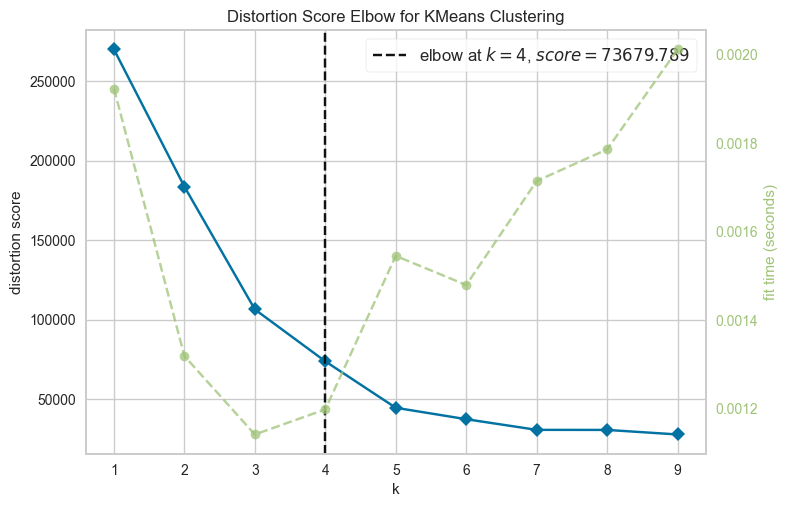

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [81]:
kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k=(1, 10))

visualizer.fit(X)
visualizer.show()

# CLUSTER MODELING

In [108]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

labels= kmeans.labels_

k = 4

def analyze_cluster(X, labels, K):
    print("Analisis Karakteristik Tiap Kluster")

    for cluster_id in range(k):
        cluster_data = X[labels == cluster_id]

        #hitung rata-rata
        #ambil seluruh baris pada kolom ke 0
        mean_income  = cluster_data[:, 0].mean()

        #hitung rata-rata seluruh baris kolom 1
        mean_spending = cluster_data[:, 1].mean()

        #tampilkan hasilnya 
        print(f'Cluster {cluster_id + 1}:')
        print(f'Rata-rata annual income k($): {mean_income:.2f}')
        print(f'Rata-rata spending : {mean_spending:.2f}'
        
    )

analyze_cluster(X, labels, k)

Analisis Karakteristik Tiap Kluster
Cluster 1:
Rata-rata annual income k($): 48.26
Rata-rata spending : 56.48
Cluster 2:
Rata-rata annual income k($): 86.54
Rata-rata spending : 82.13
Cluster 3:
Rata-rata annual income k($): 87.00
Rata-rata spending : 18.63
Cluster 4:
Rata-rata annual income k($): 26.30
Rata-rata spending : 20.91


/tmp/ipykernel_8316/1237211796.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Nilai centroid
Centroid 1 Annual Income : 48.26, Spending score = 56.48
Centroid 2 Annual Income : 86.54, Spending score = 82.13
Centroid 3 Annual Income : 87.00, Spending score = 18.63
Centroid 4 Annual Income : 26.30, Spending score = 20.91


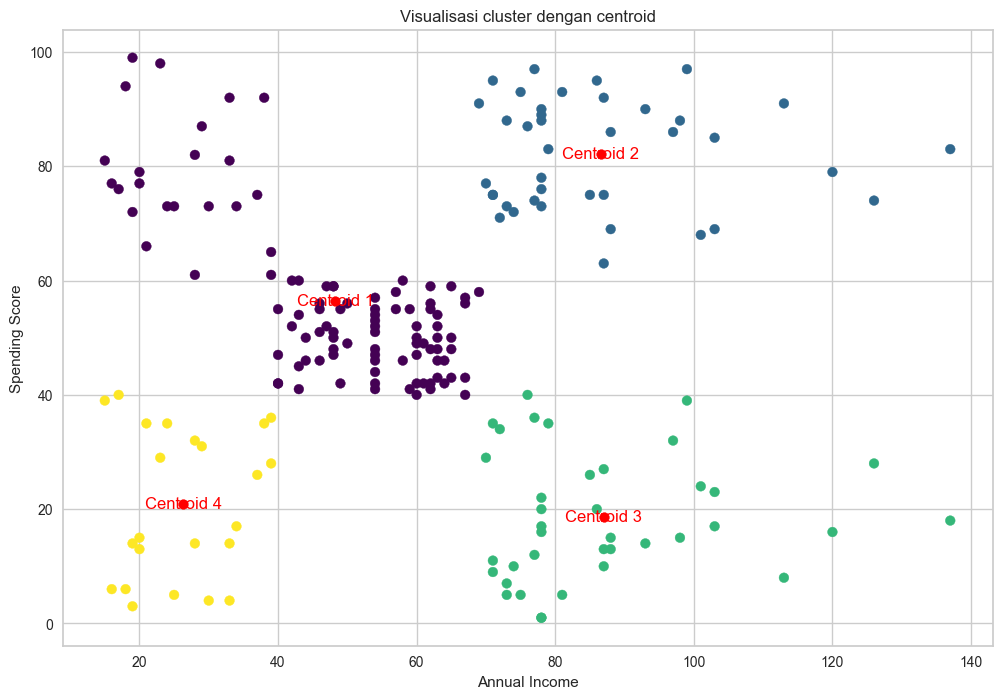

In [134]:
import matplotlib.pyplot as plt

centroids = kmeans.cluster_centers_

plt.figure(figsize=(12, 8))
#plot data
plt.scatter(X[:, 0], X[:,1], c=labels, cmap='viridis', )

#plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')

for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i + 1}', color = 'red', fontsize = 12, ha='center', va='center')

plt.title('Visualisasi cluster dengan centroid')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

#menampilkan nilai centroid
print("Nilai centroid")
for i, centroid in enumerate(centroids):
    print(f'Centroid {i + 1} Annual Income : {centroid[0]:.2f}, Spending score = {centroid[1]:.2f}')

In [122]:
centroids[1]

array([86.53846154, 82.12820513])